## 1) 데이터 준비

In [1]:
import pandas as pd
import os

fname = os.getenv('HOME') +  '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']   # 임의로 지정한 컬럼명
data = pd.read_csv(fname, sep='\t', names= col_names)      # sep='\t'로 주어야 tsv를 열 수 있습니다.  
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


In [2]:
#사용 컬럼만 남기기
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [3]:
#소문자로 바꾸기
data['artist'] = data['artist'].str.lower()
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [4]:
#첫번째 유저가 어떤 아티스트의 노래 듣는지 확인
condition = (data['user_id'] == data.loc[0, 'user_id'])
data.loc[condition]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


## 2) 데이터 탐색
- 유저 수, 아티스트 수, 인기 많은 아티스트
- 유저들이 몇 명의 아티스트를 듣고 있는지에 대한 통계
- 유저 play 횟수 중앙값에 대한 통계


In [5]:
#유니크한 유저 수
data['user_id'].nunique()

358868

In [6]:
#아티스트 수
data['artist'].nunique()

291346

In [8]:
#인기많은 아티스트 30명
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending=False).head(30)

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

In [9]:
#유저별로 몇 명의 아티스트를 듣고 있는지 통계
user_count = data.groupby('user_id')['artist'].count()
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

In [10]:
# 유저별 play횟수 중앙값에 대한 통계
user_median = data.groupby('user_id')['play'].median()
user_median.describe()

count    358868.000000
mean        142.187676
std         213.089902
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

## 3) 모델검증을 위한 사용자 초기 정보 세팅
- 유튜브 뮤직 등 추천 시스템들은 이를 위해서 처음 가입하는 사용자의 취향과 유사한 아티스트 정보를 5개 이상 입력받는 과정을 거치게 하는 경우가 많습니다.

In [11]:
my_favorite = ['black eyed peas' , 'maroon5' ,'jason mraz' ,'coldplay' ,'beyoncé']


# 'zimin'이라는 user_id가 위 아티스트의 노래를 30회씩 들었다고 가정하겠습니다.
my_playlist = pd.DataFrame({'user_id': ['zimin']*5, 'artist': my_favorite, 'play':[30]*5})

if not data.isin({'user_id':['zimin']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    data = pd.concat([data, my_playlist])                            # 위에 임의로 만든 my_playlist 데이터를 추가해 줍니다. 

data.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,zimin,black eyed peas,30
1,zimin,maroon5,30
2,zimin,jason mraz,30
3,zimin,coldplay,30
4,zimin,beyoncé,30


## 4) 모델에 활용하기 위한 전처리 (실습)
- user와 artist 각각에 번호를 붙이고 싶습니다. 보통 이런 작업을 indexing이라고 합니다

In [12]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
artist_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [13]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['zimin'])    # 358869명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 합니다. 
print(artist_to_idx['black eyed peas'])

358868
376


In [14]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist column indexing OK!!')
    data['artist'] = temp_artist_data
else:
    print('artist column indexing Fail!!')

data

user_id column indexing OK!!
artist column indexing OK!!


,user_id,artist,play
0,0,0,2137
1,0,1,1099
2,0,2,897
3,0,3,717
4,0,4,706
...,...,...,...
0,358868,376,30
1,358868,270115,30
2,358868,3746,30
3,358868,62,30


- data의 user_id와 artist 컬럼 내 값들이 모두 정수 인덱스 값으로 잘 변경되었나요? 이것으로 훈련을 위한 전처리가 완료되었습니다!!

## 5) 사용자의 명시적/암묵적 평가

In [15]:
# 1회만 play한 데이터의 비율을 보는 코드
only_one = data[data['play']==1]
one, all_data = len(only_one), len(data)
print(f'{one},{all_data}')
print(f'Ratio of only_one over all data is {one/all_data:.2%}')  # f-format에 대한 설명은 https://bit.ly/2DTLqYU"

147739,17535660
Ratio of only_one over all data is 0.84%


- 현재 모델에서의 암묵적 규칙
1. 한 번이라도 들었으면 선호한다고 판단한다.

2. 많이 재생한 아티스트에 대해 가중치를 주어서 더 확실히 좋아한다고 판단한다.

## 6) Matrix Factorization(MF)
- MF 모델은 2006년 Netflix에서 백만 달러의 상금을 걸고 개최한 자사 추천 시스템의 성능을 10% 이상 향상시키는 챌린지를 계기로 알려지게 되었습니다. 
-모델의 목표는 모든 유저와 아이템에 대해 k-dimension의 벡터를 잘 만드는 것입니다.

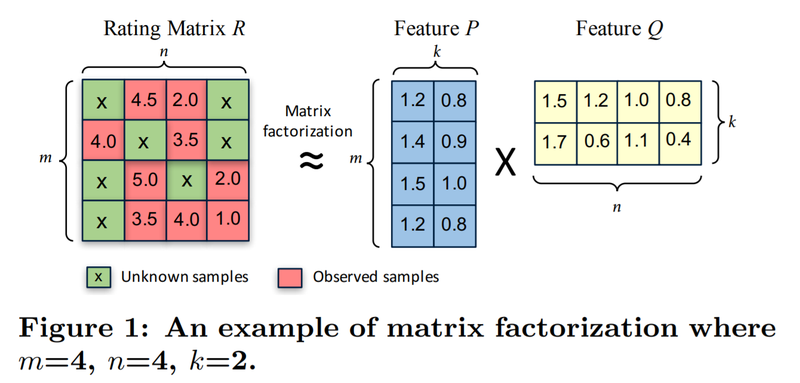


## 7) CSR(Compressed Sparse Row) Matrix


In [16]:
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape= (num_user, num_artist))
csr_data

<358869x291347 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Row format>

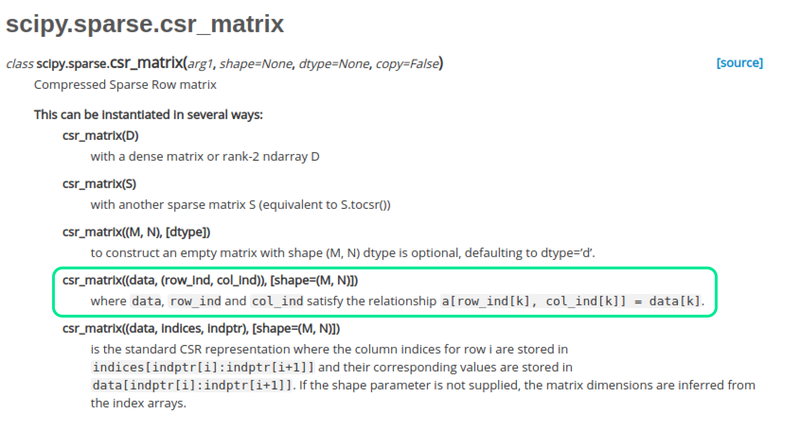

## 8)  MF 모델 학습하기
- implicit 패키지는 이전 스텝에서 설명한 암묵적(implicit) dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지입니다.
- 이 패키지에 구현된 als(AlternatingLeastSquares) 모델을 사용하겠습니다. 
- Matrix Factorization에서 쪼개진 두 Feature Matrix를 한꺼번에 훈련하는 것은 잘 수렴하지 않기 때문에, 한쪽을 고정시키고 다른 쪽을 학습하는 방식을 번갈아 수행하는 AlternatingLeastSquares 방식이 효과적인 것으로 알려져 있습니다.

In [17]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

- factors : 유저와 아이템의 벡터를 몇 차원으로 할 것인지
- regularization : 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지
- use_gpu : GPU를 사용할 것인지
- iterations : epochs와 같은 의미입니다. 데이터를 몇 번 반복해서 학습할 것인지

In [18]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [19]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<291347x358869 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Column format>

In [20]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

모델 학습이 끝났습니다! 이제 2가지를 아래 사항을 살펴보도록 하겠습니다.
- Zimin 벡터와 black eyed peas의 벡터를 어떻게 만들고 있는지
- 두 벡터를 곱하면 어떤 값이 나오는지





In [21]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]

print('슝=3')

슝=3


In [22]:
zimin_vector

array([-0.15947339, -0.49117517, -0.2061193 , -0.7791388 , -0.673875  ,
       -0.5331286 ,  1.5142944 ,  0.21324672,  0.40072024,  0.8017792 ,
        0.04027853,  0.89209294, -0.89625865,  0.48757663, -1.1203628 ,
       -0.5247911 , -1.3523029 ,  0.27068976, -0.5867046 ,  0.61790836,
       -0.20314167, -0.03272568,  0.04830972,  0.10710911, -0.5168341 ,
        0.61723375, -0.23689836,  0.48576334,  1.5692651 , -0.9598853 ,
       -0.06563542, -0.10528721, -0.43526384, -1.2736689 ,  0.873708  ,
       -1.2167208 ,  0.0959835 ,  0.5097058 ,  0.69773394,  0.34552932,
       -0.43497947, -0.42491907, -0.4085236 , -0.11555662,  0.6204898 ,
       -0.31879336, -0.35716742, -0.2831866 ,  0.44576782, -0.08978885,
        0.8305322 , -0.2830506 , -1.3188531 , -0.4018413 , -0.299604  ,
       -0.17616202,  0.24185185,  0.6187317 ,  0.24911675, -0.9361448 ,
        0.84178984, -0.04012462,  0.27459452,  0.05499964, -0.31831372,
       -0.07490857,  0.21270941, -0.45231393, -0.6870818 ,  0.18

In [23]:
black_eyed_peas_vector

array([ 2.00018007e-03, -7.90950656e-03,  1.49932103e-02, -7.51787471e-03,
        8.05309787e-03, -5.05550765e-03,  2.52839904e-02,  1.17960917e-02,
        2.13594493e-02,  9.72276647e-03,  1.39647899e-02,  1.63893029e-02,
       -1.11283027e-02,  1.58401579e-02, -1.04912808e-02, -4.44561196e-03,
       -7.30765657e-03,  1.68119427e-02,  3.42028425e-03,  1.51098371e-02,
        7.89352972e-03, -1.03117274e-02,  8.14936124e-03,  1.19984373e-02,
       -9.15712304e-03,  1.59338806e-02,  1.92075484e-02,  1.30329095e-02,
        2.15158388e-02, -1.44719065e-03,  2.14838958e-03,  2.18590000e-03,
       -2.27017142e-03, -3.91405681e-03,  1.53681505e-02,  9.04174056e-03,
        5.05793514e-03,  2.80721281e-02,  1.14346566e-02,  1.26316752e-02,
        1.90626725e-03,  5.86343091e-03, -4.08045435e-03, -2.43081129e-03,
        2.22531892e-03, -1.29896041e-03,  8.89146701e-03, -4.34184622e-05,
        3.32578197e-02, -5.33887418e-04,  3.59934606e-02,  3.54911713e-03,
       -2.55575660e-03,  

In [24]:
# zimin과 black_eyed_peas를 내적하는 코드
np.dot(zimin_vector, black_eyed_peas_vector)

0.5458808

- 이런, 1이 나와야 될 것 같은데 한참 낮은 수치인 0.49 정도가 나왔습니다. factors를 늘리거나 iterations를 늘려야 할 것 같습니다. 이후 진행되는 내용은 일단 이렇게 학습된 모델을 사용하겠습니다.



In [25]:
queen = artist_to_idx['queen']
queen_vector = als_model.item_factors[queen]
np.dot(zimin_vector, queen_vector)

0.31970963

## 9) 비슷한 아티스트 찾기 + 유저에게 추천하기
- AlternatingLeastSquares 클래스에 구현되어 있는 similar_items 메서드를 통하여 비슷한 아티스트를 찾습니다. 
- 처음으로는 제가 좋아하는 coldplay로 찾아보겠습니다.


In [26]:
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N=15)
similar_artist

[(62, 1.0000001),
 (277, 0.9889678),
 (28, 0.9825378),
 (5, 0.97720706),
 (473, 0.96797657),
 (217, 0.9667104),
 (247, 0.96492517),
 (490, 0.9639954),
 (418, 0.96152085),
 (910, 0.95250267),
 (268, 0.94503576),
 (694, 0.94454926),
 (782, 0.9406484),
 (75, 0.94015056),
 (1018, 0.93918484)]

In [27]:
 #artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성합니다. 
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'muse',
 'the killers',
 'red hot chili peppers',
 'placebo',
 'radiohead',
 'the beatles',
 'oasis',
 'u2',
 'nirvana',
 'pink floyd',
 'foo fighters',
 'the white stripes',
 'queen',
 'the smashing pumpkins']

In [28]:
def get_similar_artist(artist_name: str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist

print("슝=3")

슝=3


In [29]:
get_similar_artist('2pac')

['2pac',
 'nas',
 'notorious b.i.g.',
 'snoop dogg',
 'dr. dre',
 'the game',
 'jay-z',
 'ludacris',
 '50 cent',
 'ice cube']

In [30]:
get_similar_artist('lady gaga')

['lady gaga',
 'britney spears',
 'katy perry',
 'rihanna',
 'the pussycat dolls',
 'beyoncé',
 'christina aguilera',
 'kelly clarkson',
 'leona lewis',
 'justin timberlake']

### | 유저에게 아티스트 추천하기
- AlternatingLeastSquares 클래스에 구현되어 있는 recommend 메서드를 통하여 제가 좋아할 만한 아티스트를 추천받습니다. filter_already_liked_items 는 유저가 이미 평가한 아이템은 제외하는 Argument입니다.

In [31]:
user = user_to_idx['zimin']
# recommend에서는 user*item CSR Matrix를 받습니다.
artist_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
artist_recommended

[(350, 0.44448176),
 (369, 0.44097686),
 (550, 0.41989067),
 (274, 0.40324718),
 (391, 0.3906022),
 (1800, 0.3891536),
 (627, 0.388964),
 (434, 0.38738513),
 (355, 0.3828081),
 (354, 0.38170016),
 (564, 0.37637883),
 (409, 0.37521267),
 (621, 0.36946973),
 (2249, 0.36735559),
 (24, 0.3638615),
 (5, 0.36128172),
 (277, 0.35837135),
 (28, 0.35744083),
 (1777, 0.35524753),
 (618, 0.35329074)]

In [32]:
[idx_to_artist[i[0]] for i in artist_recommended]

['rihanna',
 'justin timberlake',
 'britney spears',
 'michael jackson',
 'christina aguilera',
 'lady gaga',
 'maroon 5',
 'eminem',
 'madonna',
 'nelly furtado',
 'kanye west',
 'amy winehouse',
 'alicia keys',
 'katy perry',
 'jack johnson',
 'red hot chili peppers',
 'muse',
 'the killers',
 'mariah carey',
 'the pussycat dolls']

In [33]:
rihanna = artist_to_idx['rihanna']
explain = als_model.explain(user, csr_data, itemid=rihanna)

In [34]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('beyoncé', 0.22451075038615065),
 ('black eyed peas', 0.12455620639395965),
 ('coldplay', 0.05710143577386832),
 ('jason mraz', 0.0408064022927866),
 ('maroon5', -0.0005240164504635471)]

- 이 method는 추천한 콘텐츠의 점수에 기여한 다른 콘텐츠와 기여도(합이 콘텐츠의 점수가 됩니다.)를 반환합니다. 어떤 아티스트들이 이 추천에 얼마나 기여하고 있는 걸까요?
- beyoncé와 black eyed peas가 가장 크게 기여했네요. 둘 다 흑인 아티스트이고 beyoncé의 경우는 같은 성별이라는 점도 크게 작용하지 않았을까 싶습니다.



